<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-(EDA)-Module" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-Module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA) Module</a></span><ul class="toc-item"><li><span><a href="#Load--Data" data-toc-modified-id="Load--Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load  Data</a></span></li><li><span><a href="#Annotate-Data" data-toc-modified-id="Annotate-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Annotate Data</a></span><ul class="toc-item"><li><span><a href="#Add-Numerical-Variables-from-String" data-toc-modified-id="Add-Numerical-Variables-from-String-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Add Numerical Variables from String</a></span></li><li><span><a href="#Add-Categorical-Variables" data-toc-modified-id="Add-Categorical-Variables-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Add Categorical Variables</a></span></li><li><span><a href="#Covert-Salary-to-USD" data-toc-modified-id="Covert-Salary-to-USD-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Covert Salary to USD</a></span></li></ul></li><li><span><a href="#Columns" data-toc-modified-id="Columns-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Columns</a></span></li></ul></li><li><span><a href="#Overview" data-toc-modified-id="Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Basic-Demographics" data-toc-modified-id="Basic-Demographics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Basic Demographics</a></span></li><li><span><a href="#Income-Analysis" data-toc-modified-id="Income-Analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Income Analysis</a></span><ul class="toc-item"><li><span><a href="#Income-by-Job-Function" data-toc-modified-id="Income-by-Job-Function-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Income by Job Function</a></span></li><li><span><a href="#Demographics-by-Income-Level" data-toc-modified-id="Demographics-by-Income-Level-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Demographics by Income Level</a></span></li></ul></li></ul></li></ul></div>

This notebook is prepared for Bootcamp 1 participants.

Please install library (in developer mode) to get started.

https://github.com/jykim/edatools

# Exploratory Data Analysis (EDA) Module

In [1]:
import os
import sys
import time
import json
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
%precision 3
%matplotlib inline
%load_ext autoreload
%autoreload 2
style.use('fivethirtyeight')

In [2]:
import logging
logging.disable(logging.ERROR)

In [3]:
import edatools.eda_table as et
import edatools.eda_display_utils as edu
import edatools.eda_bq_utils as ebu
from importlib import reload

In [4]:
et.load_bokeh()

## Load  Data

Download data from:
    https://www.kaggle.com/kaggle/kaggle-survey-2017

In [5]:
DATA_PATH = "~/dev/kaggle/kaggle-survey-2017/multipleChoiceResponses2017.csv"

In [6]:
mcr = pd.read_csv(DATA_PATH, encoding='latin-1')

/Users/jkim4/pkg/Conda37/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.



In [7]:
len(mcr)

16716

## Annotate Data 

### Add Numerical Variables from String

In [8]:
reload(et)
et.add_numeric_dtype(mcr, "JobSatisfaction")
et.add_numeric_dtype(mcr, "JobHuntTime")

### Add Categorical Variables

In [9]:
job_cat_def = [
    "Researcher",
    ("Scientist|Modeler|Miner|Statistician", "Scientist"),
    "Analyst",
    ("Engineer|Developer", "Engineer")
]

et.add_category_dtype_from_ptn(mcr, "PastJobTitlesSelect", job_cat_def)

In [10]:
employer_type_def = [
    "Self-employed",
    ["NGO|government", "non-profit"],
    ["college or university", "academia"],
    "professional services/consulting firm",
    "company that makes advanced analytic software",
    "company that doesn't perform advanced analytics",
    "company that performs advanced analytics",   
]

et.add_category_dtype_from_ptn(mcr, "CurrentEmployerType", employer_type_def)

In [11]:
et.add_category_dtype(mcr, "FormalEducation", 
                      ["Bachelor's degree", 'Professional degree', "Master's degree", 'Doctoral degree'])
et.add_category_dtype(mcr, "ParentsEducation", 
                      ["Bachelor's degree", 'Professional degree', "Master's degree", 'Doctoral degree'])
et.add_category_dtype(mcr, "Tenure", 
                      ["I don't write code to analyze data", 'Less than a year', '1 to 2 years', '3 to 5 years', '6 to 10 years', 'More than 10 years'])
et.add_category_dtype(mcr, "EmployerMLTime", 
                      ['Less than one year', '1-2 years', '3-5 years', '6-10 years', 'More than 10 years'])
et.add_category_dtype(mcr, "EmployerSize", 
                      ['Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees', 
                       '100 to 499 employees', '500 to 999 employees', '1,000 to 4,999 employees', 
                       '5,000 to 9,999 employees', '10,000 or more employees'])

In [12]:
et.add_feature_group_from_csv_col(mcr, "LearningPlatformSelect")

### Covert Salary to USD

Salary is based on local currency. Add standard salary in USD.

In [13]:
def convert_currency(tbl):
    try:
        if tbl['CompensationCurrency'] == 'AUD':
            return float(tbl['Compensation']) * 0.77
        if tbl['CompensationCurrency'] == 'BRL':
            return float(tbl['Compensation']) * 0.30
        if tbl['CompensationCurrency'] == 'CAD':
            return float(tbl['Compensation']) * 0.8
        if tbl['CompensationCurrency'] == 'EUR':
            return float(tbl['Compensation']) * 1.24
        if tbl['CompensationCurrency'] == 'INR':
            return float(tbl['Compensation']) * 0.015
        if tbl['CompensationCurrency'] == 'JPY':
            return float(tbl['Compensation']) * 0.0094
        if tbl['CompensationCurrency'] == 'RUB':
            return float(tbl['Compensation']) * 0.016
        if tbl['CompensationCurrency'] == 'TWD':
            return float(tbl['Compensation']) * 0.034
        if tbl['CompensationCurrency'] == 'GBP':
            return float(tbl['Compensation']) * 1.42
        if tbl['CompensationCurrency'] == 'CNY':
            return float(tbl['Compensation']) * 0.16
        if tbl['CompensationCurrency'] == 'KRW':
            return float(tbl['Compensation']) * 0.00094
        else: 
            return float(tbl['Compensation'])
    except:
        return None
mcr['Compensation'] = mcr.CompensationAmount.str.replace("[,\-]", "")
mcr['CompensationUSD'] = mcr.apply(convert_currency, axis=1)
mcr['CompensationUSD_100k'] = mcr['CompensationUSD'].apply(lambda e: e > 100000)

In [14]:
mcr[['Country','Compensation', 'CompensationUSD', 'CompensationCurrency', 'CompensationUSD_100k']].head(10)

,Country,Compensation,CompensationUSD,CompensationCurrency,CompensationUSD_100k
0,NaN,NaN,NaN,NaN,False
1,United States,NaN,NaN,NaN,False
2,Canada,NaN,NaN,NaN,False
3,United States,250000,250000.0,USD,True
4,Taiwan,NaN,NaN,NaN,False
5,Brazil,NaN,NaN,NaN,False
6,United States,NaN,NaN,NaN,False
7,India,NaN,NaN,NaN,False
8,Australia,80000,61600.0,AUD,False
9,Russia,1200000,19200.0,RUB,False


## Columns

In [15]:
reload(et)
eb = et.EDATable(mcr.sort_index(axis=1))

In [16]:
eb.colinfo()

,DataType,ValueCount,NullCount,0,1,2
Age,float64,84,331,NaN,30,28
AlgorithmUnderstandingLevel,object,6,9306,Enough to explain the algorithm to someone non-technical,NaN,NaN
BlogsPodcastsNewslettersSelect,object,1012,8576,"Becoming a Data Scientist Podcast,Data Machina Newsletter,O'Reilly Data Newsletter,Partially Derivative Podcast,R Bloggers Blog Aggregator","Becoming a Data Scientist Podcast,Siraj Raval YouTube Channel","FastML Blog,No Free Hunch Blog,Talking Machines Podcast"
CareerSwitcher,object,2,13704,NaN,NaN,NaN
CodeWriter,object,2,3530,Yes,NaN,NaN
Compensation,object,727,11492,NaN,NaN,NaN
CompensationAmount,object,906,11492,NaN,NaN,NaN
CompensationCurrency,object,87,12186,NaN,NaN,NaN
CompensationUSD,float64,1079,11499,NaN,NaN,NaN
CompensationUSD_100k,object,2,0,False,False,False


In [17]:
cols = eb.colinfo().query("NullCount<10000").index.tolist()

In [18]:
eb.desc(col_ptn=r"LearningPlatformSelect_", sort_values=False)

<Figure size 360x360 with 0 Axes>

In [19]:
eb.desc_detail(col_ptn=r"cat$", sort_values=False)

,CurrentEmployerType_cat
count,11601
unique,7
top,professional services/consulting firm
freq,2776
,CurrentEmployerType_cat
professional services/consulting firm,2776
company that performs advanced analytics,2240
company that doesn't perform advanced analytics,2007
academia,1739
company that makes advanced analytic software,1129


<Figure size 360x360 with 0 Axes>

In [20]:
eb.desc(col_ptn="_(int|dbl)")

<Figure size 360x360 with 0 Axes>

# Overview

## Basic Demographics

As expected, this dataset shows skewness in gender and country.

In [21]:
import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [22]:
eb.desc([
    'Age', 'Country', 'GenderSelect', 
    'FormalEducation_cat', 
    'MajorSelect',  u'StudentStatus',
    'Tenure_cat', u'PastJobTitlesSelect_cat'], outputcol=4)

,Country
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535
People 's Republic of China,471
Brazil,465
Germany,460
France,442
Canada,440


<Figure size 360x360 with 0 Axes>

In [23]:
eb.desc_detail([
    'Age', 'Country', 'GenderSelect', 
    'FormalEducation_cat', 
    'MajorSelect',  u'StudentStatus',
    'Tenure_cat', u'PastJobTitlesSelect_cat', 
    'EmploymentStatus',
    u'ProveKnowledgeSelect'], 
               output=['vcounts', 'hist'], figsize=(8,5))

,Age
25.0,969
24.0,898
26.0,886
27.0,842
23.0,839
30.0,778
28.0,761
29.0,731
22.0,694
31.0,597


<Figure size 576x360 with 0 Axes>

## Income Analysis

Data is heavily right-skewed with many extreme values

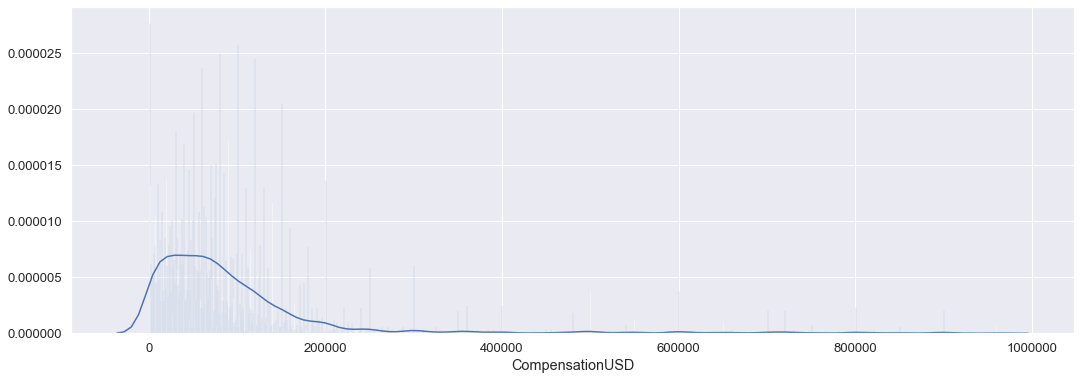

In [24]:
plt.figure(figsize=(16, 6))
sns.distplot(mcr.CompensationUSD.where((mcr.CompensationUSD<1000000) & (mcr.CompensationUSD>0)).dropna(), bins=1000)

### Income by Job Function

Median makes more sense than mean in this case:

[(0, 500000)]

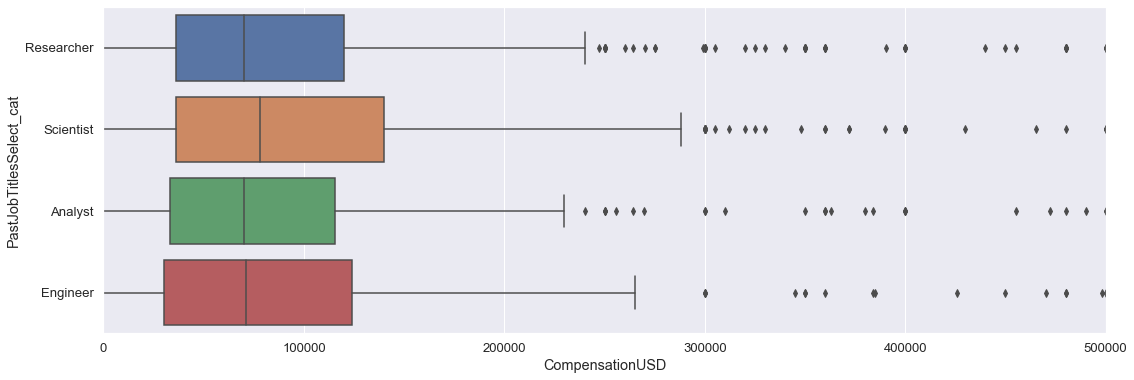

In [25]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(y="PastJobTitlesSelect_cat", x="CompensationUSD", data=mcr, orient='h')
ax.set(xlim=(0, 500000))

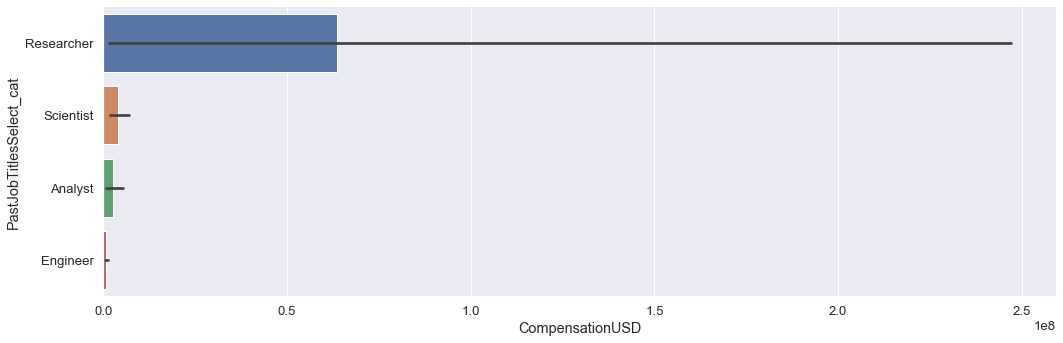

In [26]:
sns.catplot(y="PastJobTitlesSelect_cat", x="CompensationUSD", 
            data=mcr, kind="bar", aspect=3, height=5, orient='h')

### Demographics by Income Level 

In [27]:
for e in eb.groupby("CompensationUSD_100k"):
    e.desc([
        'Age', 'Country', 'GenderSelect', 
        'FormalEducation_cat', 
        'MajorSelect', 'Tenure_cat', u'PastJobTitlesSelect_cat', 
    ])

,Country
United States,3387
India,2643
Other,937
Russia,573
United Kingdom,487
People 's Republic of China,460
Brazil,457
France,432
Germany,423
Canada,411


,Country
United States,810
Other,86
Australia,65
India,61
United Kingdom,48
South Africa,45
Germany,37
Colombia,37
Mexico,32
Canada,29


<Figure size 360x360 with 0 Axes>